In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/housing_cleaned.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
print("Shape: ", df.shape)

Shape:  (545, 13)


In [5]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].str.lower().map(
        {
            'yes': 1,
            'no': 0
            }
        )

In [6]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [8]:
df.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
535,2100000,3360,2,1,1,1,0,0,0,0,1,0,False,True
536,1960000,3420,5,1,2,0,0,0,0,0,0,0,False,True
537,1890000,1700,3,1,2,1,0,0,0,0,0,0,False,True
538,1890000,3649,2,1,1,1,0,0,0,0,0,0,False,True
539,1855000,2990,2,1,1,0,0,0,0,0,1,0,False,True
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,False,True


In [9]:
X = df.drop('price', axis=1)
y = df['price']

In [10]:
print("X-shape: ", X.shape)
print("y-shape: ", y.shape)

X-shape:  (545, 13)
y-shape:  (545,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 13)
(109, 13)
(436,)
(109,)


In [14]:
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(109,)


In [17]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = 100 * (1 - (np.mean(np.abs((y_test - y_pred) / y_test))))

In [18]:
print(f"Root Mean Squared Error: ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Relative Accuracy: {accuracy:.2f}%")

Root Mean Squared Error: ₹1,422,170.76
R² Score: 0.5999
Relative Accuracy: 77.92%


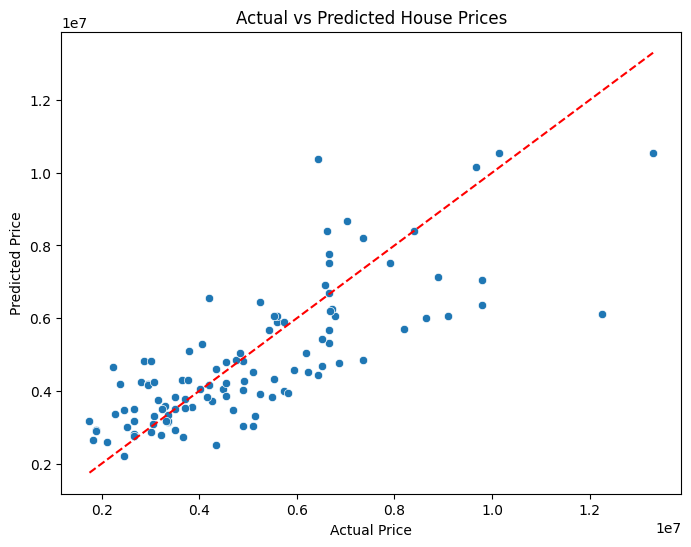

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [22]:
importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

In [23]:
print(importances)
print(features)
print(sorted_idx)

[0.06807618 0.03253608 0.2879528  0.04019614 0.03915476 0.04783871
 0.05767199 0.08231498 0.14457856 0.0400233  0.06903457 0.0126765
 0.07794539]
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')
[ 2  8  7 12 10  0  6  5  3  9  4  1 11]


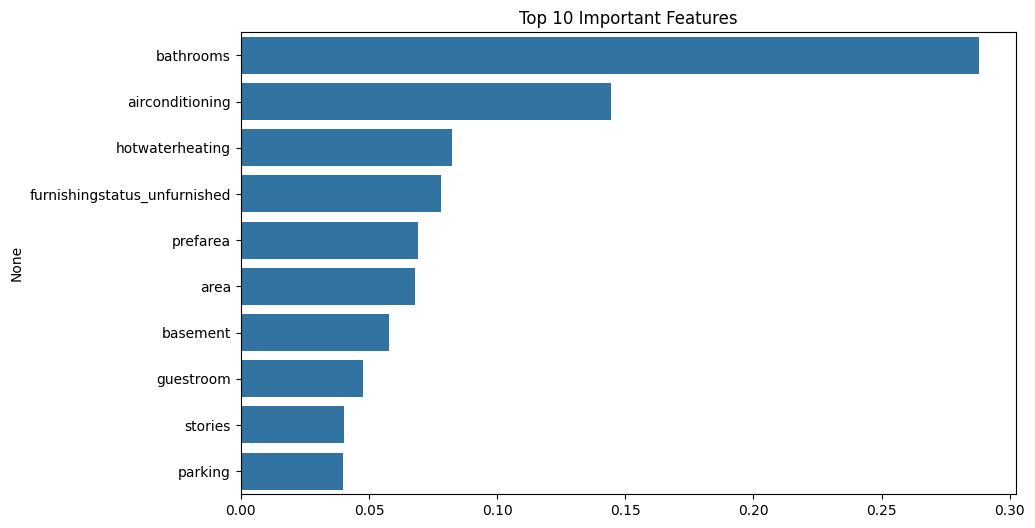

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx][:10], y=features[sorted_idx][:10])
plt.title("Top 10 Important Features")
plt.show()

In [26]:
joblib.dump(model, '../models/final_model.pkl')
print("Model saved to models/final_model.pkl")

Model saved to models/final_model.pkl
